上一节中，我们介绍了如何用密集连接的神经网络将向量输入划分为两个互斥的类别，本节你会构建一个网络，将路透社新闻划分为46 个互斥的主题。因为有多个类别，所以 这是多分类（multiclass classification）问题
- 因为每个数据点只能划分到一个类别， 所以更具体地说，这是单标签、多分类（single-label, multiclass classification）问题
- 每个数据点可以划分到多个类别（主题），那它就是一个多标签、多分类（multilabel, multiclass classification）问题

### 路透社数据集
包含许多短新闻及其对应的主题，由路透社在1986 年发布。它 是一个简单的、广泛使用的文本分类数据集。它包括46 个不同的主题：某些主题的样本更多， 但训练集中每个主题都有至少 10 个样本

#### 加载数据集

In [2]:
from keras.datasets import reuters

(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.
C:\Users\Dell\Anaconda3\envs\tensorflow\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Dell\Anaconda3\envs\tensorflow\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
print(len(train_data),len(train_labels),len(test_data),len(test_labels))

8982 8982 2246 2246


In [4]:
print(train_data[0],len(train_data),sep='===')

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]===8982


In [5]:
# 样本对应的标签是一个 0~45 范围内的整数，即话题索引编号
print(train_labels[0])
print(max(train_labels),min(train_labels))

3
45 0


#### 解码索引为文本

In [6]:
word_index = reuters.get_word_index()
index_word = dict([(value,key) for (key,value) in word_index.items()])
# 解码某一条新闻序列,记得i-3
# 因为0、1、2 是为“padding”（填充）、“ start of sequence”、“unknown”分别保留的索引
decoded_newswire = ' '.join(index_word.get(i-3,'?') for i in train_data[5])
decoded_newswire

"? the u s agriculture department estimated canada's 1986 87 wheat crop at 31 85 mln tonnes vs 31 85 mln tonnes last month it estimated 1985 86 output at 24 25 mln tonnes vs 24 25 mln last month canadian 1986 87 coarse grain production is projected at 27 62 mln tonnes vs 27 62 mln tonnes last month production in 1985 86 is estimated at 24 95 mln tonnes vs 24 95 mln last month canadian wheat exports in 1986 87 are forecast at 19 00 mln tonnes vs 18 00 mln tonnes last month exports in 1985 86 are estimated at 17 71 mln tonnes vs 17 72 mln last month reuter 3"

### 准备数据
#### 将数据向量化

In [7]:
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

# 向量化训练和测试数据
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
print(len(x_train))

8982


#### 将标签向量化
标签向量化有两种方法：你可以将标签列表转换为整数张量，或者使用one-hot 编码

In [10]:
# one_hot 编码
def to_one_hot(labels,dimension=46):
    results = np.zeros((len(labels),dimension))
    for i,label in enumerate(labels):
        results[i,label] = 1
    return results

# one_hot 训练和测试标签
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [11]:
one_hot_test_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
len(one_hot_train_labels)

8982

### 构建网络

In [13]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


### 编译模型

In [14]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

### 分开验证和测试集

In [15]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

### 训练模型

In [16]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    batch_size=512,
                    epochs=20,
                    validation_data=[x_val,y_val])

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 179us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 144us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 141us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 141us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 140us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 138us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 136us/step - loss: 0.4581 - a

### 绘制损失曲线和精度曲线

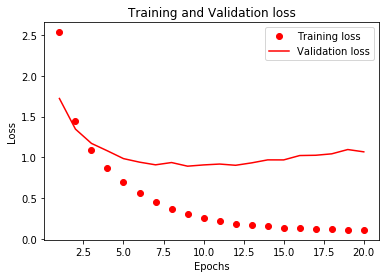

In [19]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'ro',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

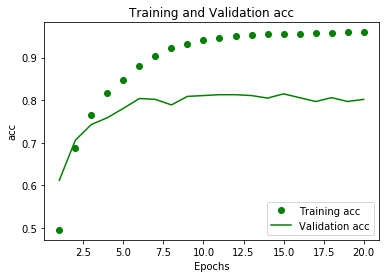

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs,acc,'go',label='Training acc')
plt.plot(epochs,val_acc,'g',label='Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

#### 网络在训练9 轮后开始过拟合,从头开始训练一个新网络，共9 个轮次，然后在测试 集上评估模型

In [23]:
# 建立模型
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
# 编译模型
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['acc'])
# 训练模型
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 179us/step - loss: 2.8047 - acc: 0.5038 - val_loss: 1.8426 - val_acc: 0.6320
Epoch 2/9
7982/7982 [==============================] - 1s 138us/step - loss: 1.5257 - acc: 0.6961 - val_loss: 1.3305 - val_acc: 0.7100
Epoch 3/9
7982/7982 [==============================] - 1s 137us/step - loss: 1.1116 - acc: 0.7707 - val_loss: 1.1381 - val_acc: 0.7470
Epoch 4/9
7982/7982 [==============================] - 1s 136us/step - loss: 0.8719 - acc: 0.8157 - val_loss: 1.0299 - val_acc: 0.7830
Epoch 5/9
7982/7982 [==============================] - 1s 135us/step - loss: 0.7034 - acc: 0.8473 - val_loss: 0.9681 - val_acc: 0.8040
Epoch 6/9
7982/7982 [==============================] - 1s 137us/step - loss: 0.5662 - acc: 0.8756 - val_loss: 0.9412 - val_acc: 0.7990
Epoch 7/9
7982/7982 [==============================] - 1s 138us/step - loss: 0.4570 - acc: 0.9064 - val_loss: 0.9243 - val_acc: 0.7970
Epoch 8

In [26]:
results = model.evaluate(x_test,one_hot_test_labels)
results

2246/2246 [==============================] - 0s 124us/step


[0.9781010229462295, 0.789848619715401]

In [33]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
# 求出重复类别的布尔值
hits_array = np.array(test_labels) == np.array(test_labels_copy)
# 求出类别重复的所占的比例
float(np.sum(hits_array)/len(test_labels))

0.188780053428317

### 在新数据上生成预测
模型实例的 predict 方法返回了在46 个主题上的概率分布。我们对所有测 试数据生成主题预测

In [46]:
predictions = model.predict(x_test)

In [50]:
# predictions 中的每个元素都是长度为 46 的向量
print(predictions[0].shape)
# 设置输出精度
np.set_printoptions(precision=0,suppress=True)
# 向量的所有元素总和为 1
print(np.sum(predictions[1]))

(46,)
1.0000001


In [43]:
# 最大的元素就是预测类别，即概率最大的类别的索引
np.argmax(predictions[0])

3